# Pandas for Exploratory Data Analysis II 

Pandas a very useful Python library for data manipulation and exploration. We have so much more to see!

In this lesson, we'll continue exploring Pandas for EDA. Specifically: 

- Identify and handle missing values with Pandas.
- Implement groupby statements for specific segmented analysis.
- Use apply functions to clean data with Pandas.

We'll implicitly review many functions from our first Pandas lesson along the way!

## Remember the AdventureWorks Cycles Dataset?
<img align="right" src="http://lh6.ggpht.com/_XjcDyZkJqHg/TPaaRcaysbI/AAAAAAAAAFo/b1U3q-qbTjY/AdventureWorks%20Logo%5B5%5D.png?imgmax=800">

Here's the Production.Product table [data dictionary](https://www.sqldatadictionary.com/AdventureWorks2014/Production.Product.html), which is a description of the fields (columns) in the table (the .csv file we will import below):<br>
- **ProductID** - Primary key for Product records.
- **Name** - Name of the product.
- **ProductNumber** - Unique product identification number.
- **MakeFlag** - 0 = Product is purchased, 1 = Product is manufactured in-house.
- **FinishedGoodsFlag** - 0 = Product is not a salable item. 1 = Product is salable.
- **Color** - Product color.
- **SafetyStockLevel** - Minimum inventory quantity.
- **ReorderPoint** - Inventory level that triggers a purchase order or work order.
- **StandardCost** - Standard cost of the product.
- **ListPrice** - Selling price.
- **Size** - Product size.
- **SizeUnitMeasureCode** - Unit of measure for the Size column.
- **WeightUnitMeasureCode** - Unit of measure for the Weight column.
- **DaysToManufacture** - Number of days required to manufacture the product.
- **ProductLine** - R = Road, M = Mountain, T = Touring, S = Standard
- **Class** - H = High, M = Medium, L = Low
- **Style** - W = Womens, M = Mens, U = Universal
- **ProductSubcategoryID** - Product is a member of this product subcategory. Foreign key to ProductSubCategory.ProductSubCategoryID.
- **ProductModelID** - Product is a member of this product model. Foreign key to ProductModel.ProductModelID.
- **SellStartDate** - Date the product was available for sale.
- **SellEndDate** - Date the product was no longer available for sale.
- **DiscontinuedDate** - Date the product was discontinued.
- **rowguid** - ROWGUIDCOL number uniquely identifying the record. Used to support a merge replication sample.
- **ModifiedDate** - Date and time the record was last updated.


### Import Pandas

In [12]:
import pandas as pd
import numpy as np # used for linear algebra and random sampling
# used for plotting charts within the notebook (instead of a separate window)
%matplotlib inline

### Read in the dataset

We are using the `read_csv()` method (and the `\t` separator to specify tab-delimited columns).

In [13]:
# read in the dataset
prod = pd.read_csv('../data/Production.Product.csv', sep='\t')

In [14]:
# let's check out the first 3 rows again, for old time's sake
prod.head(3)

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
1,2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
2,3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000


In [15]:
# and the number of rows x cols
prod.shape

(504, 25)

### Reset our index (like last time)

Let's bring our `ProductID` column into the index since it's the PK (primary key) of our table and that's where PKs belong as a best practice.

In [16]:
# repalace auto-generated index with the ProductID column
prod.set_index('ProductID', inplace=True)

## Handling missing data

Recall missing data is a systemic, challenging problem for data scientists. Imagine conducting a poll, but some of the data gets lost, or you run out of budget and can't complete it! 😮<br><br>

"Handling missing data" itself is a broad topic. We'll focus on two components:

- Using Pandas to identify we have missing data
- Strategies to fill in missing data (known in the business as `imputing`)
- Filling in missing data with Pandas


### Identifying missing data

Before *handling*, we must identify we're missing data at all!

We have a few ways to explore missing data, and they are reminiscient of our Boolean filters.

In [17]:
# True when data isn't missing
prod.notnull()

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,True,True,True,True,False,True,True,True,True,False,...,False,False,False,False,False,True,False,False,True,True
2,True,True,True,True,False,True,True,True,True,False,...,False,False,False,False,False,True,False,False,True,True
3,True,True,True,True,False,True,True,True,True,False,...,False,False,False,False,False,True,False,False,True,True
4,True,True,True,True,False,True,True,True,True,False,...,False,False,False,False,False,True,False,False,True,True
316,True,True,True,True,False,True,True,True,True,False,...,False,False,False,False,False,True,False,False,True,True
317,True,True,True,True,True,True,True,True,True,False,...,False,True,False,False,False,True,False,False,True,True
318,True,True,True,True,True,True,True,True,True,False,...,False,True,False,False,False,True,False,False,True,True
319,True,True,True,True,True,True,True,True,True,False,...,False,False,False,False,False,True,False,False,True,True
320,True,True,True,True,True,True,True,True,True,False,...,False,False,False,False,False,True,False,False,True,True


In [9]:
# True when data is missing
prod.isnull().head(3)

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,True,False,False,False,False,True,...,True,True,True,True,True,False,True,True,False,False
2,False,False,False,False,True,False,False,False,False,True,...,True,True,True,True,True,False,True,True,False,False
3,False,False,False,False,True,False,False,False,False,True,...,True,True,True,True,True,False,True,True,False,False


In [18]:
prod.notnull().head(3)

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,True,True,True,True,False,True,True,True,True,False,...,False,False,False,False,False,True,False,False,True,True
2,True,True,True,True,False,True,True,True,True,False,...,False,False,False,False,False,True,False,False,True,True
3,True,True,True,True,False,True,True,True,True,False,...,False,False,False,False,False,True,False,False,True,True


In [21]:
prod["Color"].head(10)

ProductID
1         NaN
2         NaN
3         NaN
4         NaN
316       NaN
317     Black
318     Black
319     Black
320    Silver
321    Silver
Name: Color, dtype: object

In [23]:
prod[prod["Color"] == "Black"]#["Color"].head(10)

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
317,LL Crankarm,CA-5965,0,0,Black,500,375,0.0000,0.00,NaN,...,NaN,L,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{3C9D10B7-A6B2-4774-9963-C19DCEE72FEA},2014-02-08 10:01:36.827000000
318,ML Crankarm,CA-6738,0,0,Black,500,375,0.0000,0.00,NaN,...,NaN,M,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{EABB9A92-FA07-4EAB-8955-F0517B4A4CA7},2014-02-08 10:01:36.827000000
319,HL Crankarm,CA-7457,0,0,Black,500,375,0.0000,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{7D3FD384-4F29-484B-86FA-4206E276FE58},2014-02-08 10:01:36.827000000
322,Chainring,CR-7833,0,0,Black,1000,750,0.0000,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{F0AC2C4D-1A1F-4E3C-B4D9-68AEA0EC1CE4},2014-02-08 10:01:36.827000000
680,"HL Road Frame - Black, 58",FR-R92B-58,1,1,Black,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{43DD68D6-14A4-461F-9069-55309D90EA7E},2014-02-08 10:01:36.827000000
708,"Sport-100 Helmet, Black",HL-U509,0,1,Black,4,3,13.0863,34.99,NaN,...,S,NaN,NaN,31.0,33.0,2011-05-31 00:00:00,NaN,NaN,{A25A44FB-C2DE-4268-958F-110B8D7621E2},2014-02-08 10:01:36.827000000
722,"LL Road Frame - Black, 58",FR-R38B-58,1,1,Black,500,375,204.6251,337.22,58,...,R,L,U,14.0,9.0,2011-05-31 00:00:00,NaN,NaN,{2140F256-F705-4D67-975D-32DE03265838},2014-02-08 10:01:36.827000000
723,"LL Road Frame - Black, 60",FR-R38B-60,1,1,Black,500,375,204.6251,337.22,60,...,R,L,U,14.0,9.0,2011-05-31 00:00:00,NaN,NaN,{AA95E2A5-E7C4-4B74-B1EA-B52EE3B51537},2014-02-08 10:01:36.827000000
724,"LL Road Frame - Black, 62",FR-R38B-62,1,1,Black,500,375,204.6251,337.22,62,...,R,L,U,14.0,9.0,2011-05-31 00:00:00,NaN,NaN,{5247BE33-50BF-4527-8A30-A39AAE500A8E},2014-02-08 10:01:36.827000000


In [30]:
prod[prod["Color"].notnull()]["Color"]

ProductID
317     Black
318     Black
319     Black
320    Silver
321    Silver
322     Black
332    Silver
351    Silver
352    Silver
461    Silver
679    Silver
680     Black
706       Red
707       Red
708     Black
709     White
710     White
711      Blue
712     Multi
713     Multi
714     Multi
715     Multi
716     Multi
717       Red
718       Red
719       Red
720       Red
721       Red
722     Black
723     Black
        ...  
967      Blue
968      Blue
969      Blue
970      Blue
971      Blue
972      Blue
973    Yellow
974    Yellow
975    Yellow
976    Yellow
977     Black
978      Blue
979      Blue
980    Silver
981    Silver
982    Silver
983    Silver
984    Silver
985    Silver
986    Silver
987    Silver
988    Silver
989     Black
990     Black
991     Black
992     Black
993     Black
997     Black
998     Black
999     Black
Name: Color, Length: 256, dtype: object

In [32]:
prod[prod["Color"].notnull() & prod["Size"].notnull()]

,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
680,"HL Road Frame - Black, 58",FR-R92B-58,1,1,Black,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{43DD68D6-14A4-461F-9069-55309D90EA7E},2014-02-08 10:01:36.827000000
706,"HL Road Frame - Red, 58",FR-R92R-58,1,1,Red,500,375,1059.3100,1431.50,58,...,R,H,U,14.0,6.0,2008-04-30 00:00:00,NaN,NaN,{9540FF17-2712-4C90-A3D1-8CE5568B2462},2014-02-08 10:01:36.827000000
709,"Mountain Bike Socks, M",SO-B909-M,0,1,White,4,3,3.3963,9.50,M,...,M,NaN,U,23.0,18.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{18F95F47-1540-4E02-8F1F-CC1BCB6828D0},2014-02-08 10:01:36.827000000
710,"Mountain Bike Socks, L",SO-B909-L,0,1,White,4,3,3.3963,9.50,L,...,M,NaN,U,23.0,18.0,2011-05-31 00:00:00,2012-05-29 00:00:00,NaN,{161C035E-21B3-4E14-8E44-AF508F35D80A},2014-02-08 10:01:36.827000000
713,"Long-Sleeve Logo Jersey, S",LJ-0192-S,0,1,Multi,4,3,38.4923,49.99,S,...,S,NaN,U,21.0,11.0,2011-05-31 00:00:00,NaN,NaN,{FD449C82-A259-4FAE-8584-6CA0255FAF68},2014-02-08 10:01:36.827000000
714,"Long-Sleeve Logo Jersey, M",LJ-0192-M,0,1,Multi,4,3,38.4923,49.99,M,...,S,NaN,U,21.0,11.0,2011-05-31 00:00:00,NaN,NaN,{6A290063-A0CF-432A-8110-2EA0FDA14308},2014-02-08 10:01:36.827000000
715,"Long-Sleeve Logo Jersey, L",LJ-0192-L,0,1,Multi,4,3,38.4923,49.99,L,...,S,NaN,U,21.0,11.0,2011-05-31 00:00:00,NaN,NaN,{34CF5EF5-C077-4EA0-914A-084814D5CBD5},2014-02-08 10:01:36.827000000
716,"Long-Sleeve Logo Jersey, XL",LJ-0192-X,0,1,Multi,4,3,38.4923,49.99,XL,...,S,NaN,U,21.0,11.0,2011-05-31 00:00:00,NaN,NaN,{6EC47EC9-C041-4DDA-B686-2125D539CE9B},2014-02-08 10:01:36.827000000
717,"HL Road Frame - Red, 62",FR-R92R-62,1,1,Red,500,375,868.6342,1431.50,62,...,R,H,U,14.0,6.0,2011-05-31 00:00:00,NaN,NaN,{052E4F8B-0A2A-46B2-9F42-10FEBCFAE416},2014-02-08 10:01:36.827000000


Now, we may want to see null values in aggregate. We can use `sum()` to sum down a given column

In [11]:
# here is a quick and dirty way to do it
prod.isnull().sum()

Name                       0
ProductNumber              0
MakeFlag                   0
FinishedGoodsFlag          0
Color                    248
SafetyStockLevel           0
ReorderPoint               0
StandardCost               0
ListPrice                  0
Size                     293
SizeUnitMeasureCode      328
WeightUnitMeasureCode    299
Weight                   299
DaysToManufacture          0
ProductLine              226
Class                    257
Style                    293
ProductSubcategoryID     209
ProductModelID           209
SellStartDate              0
SellEndDate              406
DiscontinuedDate         504
rowguid                    0
ModifiedDate               0
dtype: int64

In [33]:
prod.notnull().sum()

Name                     504
ProductNumber            504
MakeFlag                 504
FinishedGoodsFlag        504
Color                    256
SafetyStockLevel         504
ReorderPoint             504
StandardCost             504
ListPrice                504
Size                     211
SizeUnitMeasureCode      176
WeightUnitMeasureCode    205
Weight                   205
DaysToManufacture        504
ProductLine              278
Class                    247
Style                    211
ProductSubcategoryID     295
ProductModelID           295
SellStartDate            504
SellEndDate               98
DiscontinuedDate           0
rowguid                  504
ModifiedDate             504
dtype: int64

In [35]:
type(prod.notnull().sum())

pandas.core.series.Series

In [36]:
a = 5

isinstance(a, int)

True

Look! We've found missing values!

How could this missing data be problematic for our analysis?

### Understanding missing data

Finding missing data is the easy part! Determining way to do next is more complicated.

Typically, we are most interested in knowing **why** we are missing data. Once we know what 'type of missingness' we have (the source of missing data), we can proceed effectively.

Let's first quantify how much data we are missing. Here is another implementation of `prod.isnull().sum()`, only wrapped with a `DataFrame` and some labels to make it a little more user-friendly:

In [37]:
# or we can make things pretty as follows
null_df = pd.DataFrame(prod.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values(['Count of Nulls'], ascending=False).head(10)

,Count of Nulls
Column,
DiscontinuedDate,504
SellEndDate,406
SizeUnitMeasureCode,328
Weight,299
WeightUnitMeasureCode,299
Size,293
Style,293
Class,257
Color,248


### Filling in missing data

How we fill in data depends largely on why it is missing (types of missingness) and what sampling we have available to us.

We may:

- Delete missing data altogether
- Fill in missing data with:
    - The average of the column
    - The median of the column
    - A predicted amount based on other factors
- Collect more data:
    - Resample the population
    - Followup with the authority providing data that is missing


In our case, let's focus on handling missing values in `Color`. Let's get a count of the unique values in that column. We will need to use the `dropna=False` kwarg, otherwise the `pd.Series.value_counts()` method will not count `NaN` (null) values.

In [41]:
# let's get a value count with the nulls included
prod['Color'].value_counts(dropna=False)

NaN             248
Black            93
Silver           43
Red              38
Yellow           36
Blue             26
Multi             8
Silver/Black      7
White             4
Grey              1
Name: Color, dtype: int64

Ahoy! We have 248 nulls!

Option 1: Drop the missing values.

In [43]:
# drops rows where any row has a missing value - this does not happen *in place*, so we are not actually dropping
prod['Color'].dropna(inplace=False)

ProductID
317     Black
318     Black
319     Black
320    Silver
321    Silver
322     Black
332    Silver
351    Silver
352    Silver
461    Silver
679    Silver
680     Black
706       Red
707       Red
708     Black
709     White
710     White
711      Blue
712     Multi
713     Multi
714     Multi
715     Multi
716     Multi
717       Red
718       Red
719       Red
720       Red
721       Red
722     Black
723     Black
        ...  
967      Blue
968      Blue
969      Blue
970      Blue
971      Blue
972      Blue
973    Yellow
974    Yellow
975    Yellow
976    Yellow
977     Black
978      Blue
979      Blue
980    Silver
981    Silver
982    Silver
983    Silver
984    Silver
985    Silver
986    Silver
987    Silver
988    Silver
989     Black
990     Black
991     Black
992     Black
993     Black
997     Black
998     Black
999     Black
Name: Color, Length: 256, dtype: object

**Important!** `pd.DataFrame.dropna()` and `pd.Series.dropna()` are very versatile! Let's look at the docs (Series is similar):

```python
Signature: pd.DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)
Docstring:
Remove missing values.

See the :ref:`User Guide <missing_data>` for more on which values are
considered missing, and how to work with missing data.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    Determine if rows or columns which contain missing values are
    removed.

    * 0, or 'index' : Drop rows which contain missing values.
    * 1, or 'columns' : Drop columns which contain missing value.

    .. deprecated:: 0.23.0: Pass tuple or list to drop on multiple
    axes.
how : {'any', 'all'}, default 'any'
    Determine if row or column is removed from DataFrame, when we have
    at least one NA or all NA.

    * 'any' : If any NA values are present, drop that row or column.
    * 'all' : If all values are NA, drop that row or column.
thresh : int, optional
    Require that many non-NA values.
subset : array-like, optional
    Labels along other axis to consider, e.g. if you are dropping rows
    these would be a list of columns to include.
inplace : bool, default False
    If True, do operation inplace and return None.
```

**how**: This tells us if we want to remove a row if _any_ of the columns have a null, or _all_ of the columns have a null.<br>
**subset**: We can input an array here, like `['Color', 'Size', 'Weight']`, and it will only consider nulls in those columns. This is very useful!<br>
**inplace**: This is if you want to mutate (change) the source dataframe. Default is `False`, so it will return a _copy_ of the source dataframe.

To accomplish the same thing, but implement it on our entire dataframe, we can do the following:

In [44]:
# drops all nulls from the Color column, but returns the entire dataframe instead of just the Color column
prod.dropna(how='any', subset=['Color'], inplace=False).shape

(256, 24)

Option 2: Fill in missing values

Traditionally, we fill missing data with a median, average, or mode (most frequently occurring). For `Color`, let's replace the nulls with the string value `NoColor`.

Let's first look at the way we'd do it with a single column, using the `pd.Series.fillna()` method:

In [49]:
prod['Color'].fillna(value='NoColor').head(10)

ProductID
1      NoColor
2      NoColor
3      NoColor
4      NoColor
316    NoColor
317      Black
318      Black
319      Black
320     Silver
321     Silver
Name: Color, dtype: object

Now let's see how we'd do it to the whole dataframe, using the `pd.DataFrame.fillna()` method. Notice the similar API between the methods with the `value` kwarg. Good congruent design, pandas development team! The full dataframe is returned, and not just a column.

In [52]:
prod.fillna(value={'Color': 'NoColor', "Size": 0}).head(10)

Column,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,NoColor,1000,750,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
2,Bearing Ball,BA-8327,0,0,NoColor,1000,750,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
3,BB Ball Bearing,BE-2349,1,0,NoColor,800,600,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000
4,Headset Ball Bearings,BE-2908,0,0,NoColor,800,600,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B},2014-02-08 10:01:36.827000000
316,Blade,BL-2036,1,0,NoColor,800,600,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{E73E9750-603B-4131-89F5-3DD15ED5FF80},2014-02-08 10:01:36.827000000
317,LL Crankarm,CA-5965,0,0,Black,500,375,0.0,0.0,0,...,NaN,L,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{3C9D10B7-A6B2-4774-9963-C19DCEE72FEA},2014-02-08 10:01:36.827000000
318,ML Crankarm,CA-6738,0,0,Black,500,375,0.0,0.0,0,...,NaN,M,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{EABB9A92-FA07-4EAB-8955-F0517B4A4CA7},2014-02-08 10:01:36.827000000
319,HL Crankarm,CA-7457,0,0,Black,500,375,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{7D3FD384-4F29-484B-86FA-4206E276FE58},2014-02-08 10:01:36.827000000
320,Chainring Bolts,CB-2903,0,0,Silver,1000,750,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{7BE38E48-B7D6-4486-888E-F53C26735101},2014-02-08 10:01:36.827000000


But wait! There's more! We can reference any other data or formulas we want with the imputation (the value we fill the nulls with). This is very handy if you want to impute with the average or median of that column... or even another column altogether! Here is an example where we will the nulls of `Color` with the average value from the `ListPrice` column. This has no practical value in this application, but immense value in other applications.

In [53]:
prod.fillna(value={'Color': prod['ListPrice'].mean()}).head(3)

Column,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
ProductID,,,,,,,,,,,,,,,,,,,,,
1,Adjustable Race,AR-5381,0,0,438.666,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{694215B7-08F7-4C0D-ACB1-D734BA44C0C8},2014-02-08 10:01:36.827000000
2,Bearing Ball,BA-8327,0,0,438.666,1000,750,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{58AE3C20-4F3A-4749-A7D4-D568806CC537},2014-02-08 10:01:36.827000000
3,BB Ball Bearing,BE-2349,1,0,438.666,800,600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2008-04-30 00:00:00,NaN,NaN,{9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E},2014-02-08 10:01:36.827000000


They're gone! Important points:

- Don't forget to use the `inplace=True` kwarg to mutate the source dataframe (i.e. 'save changes'). 
- It is helpful to not use `inplace=True` initially to ensure your code/logic is correct, prior to making permanent changes.

## Groupby Statements

In Pandas, groupby statements are similar to pivot tables in that they allow us to segment our population to a specific subset.

For example, if we want to know the average number of bottles sold and pack sizes per city, a groupby statement would make this task much more straightforward.


To think how a groupby statement works, think about it like this:

- **Split:** Separate our DataFrame by a specific attribute, for example, group by `Color`
- **Combine:** Put our DataFrame back together and return some _aggregated_ metric, such as the `sum`, `count`, or `max`.

![](http://i.imgur.com/yjNkiwL.png)

Let's try it out!

Let's group by `Color`, and get a count of products for each color.

In [55]:
# group by Color, giving the number of products of each %color
prod.groupby(by=['Color']).count()

Column,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,SizeUnitMeasureCode,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
Color,,,,,,,,,,,,,,,,,,,,,
Black,93,93,93,93,93,93,93,93,71,55,...,86,72,71,89,89,93,44,0,93,93
Blue,26,26,26,26,26,26,26,26,25,22,...,26,22,25,26,26,26,0,0,26,26
Grey,1,1,1,1,1,1,1,1,0,0,...,1,0,0,1,1,1,1,0,1,1
Multi,8,8,8,8,8,8,8,8,7,0,...,8,0,8,8,8,8,3,0,8,8
Red,38,38,38,38,38,38,38,38,37,37,...,38,37,37,38,38,38,30,0,38,38
Silver,43,43,43,43,43,43,43,43,31,30,...,31,30,30,36,36,43,6,0,43,43
Silver/Black,7,7,7,7,7,7,7,7,0,0,...,7,6,0,7,7,7,0,0,7,7
White,4,4,4,4,4,4,4,4,4,0,...,4,0,4,4,4,4,2,0,4,4
Yellow,36,36,36,36,36,36,36,36,36,32,...,36,32,36,36,36,36,0,0,36,36


What do we notice about this output? Are all columns the same? Why or why not?

We can see that the `.count()` method excludes nulls, and there is no way to change this with the current implementation:
```python
Signature: .count()
Docstring: Compute count of group, excluding missing values 
File:      ~/miniconda3/envs/ga/lib/python3.7/site-packages/pandas/core/groupby/groupby.py
Type:      method
```

As a best practice, you should either:
- fill in nulls prior to your .count(), or
- use the PK (primary key) of the table, which is guaranteed non-null

In [56]:
# here we can use 'x' as a dummy placeholder for nulls, simply to get consistent counts for all columns
prod.groupby('Color', as_index=False).count()['Color']

0           Black
1            Blue
2            Grey
3           Multi
4             Red
5          Silver
6    Silver/Black
7           White
8          Yellow
Name: Color, dtype: object

Let's find out the most expensive price for an item, by `Color`:

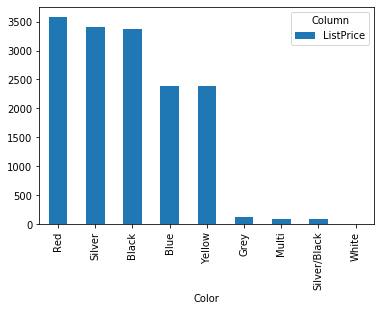

In [67]:
prod[['Color', 'ListPrice']].groupby(by='Color').max().sort_values('ListPrice', ascending=False).plot(kind="Bar")

We can also do multi-level groupbys. This is referred to as a `Multiindex` dataframe. Here, we can see the following fields in a nested group by, with a count of Name (with nulls filled!); effectively giving us a count of the number of products for every unique Class/Style combination:

- Class - H = High, M = Medium, L = Low
- Style - W = Womens, M = Mens, U = Universal

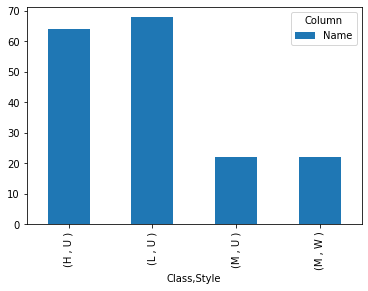

In [68]:
prod.fillna(value={'Name': 'x'}).groupby(by=['Class', 'Style']).count()[['Name']].plot(kind="bar")

We can also use the `.agg()` method with multiple arguments, to simulate a `.describe()` method like we used before:

In [70]:
agg = prod.groupby(by=['Color'])['ListPrice'].agg(['count', 'mean', 'min', 'max'])

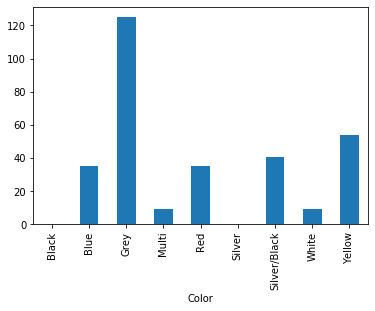

In [72]:
agg["min"].plot(kind="bar")

## Apply functions for column operations

Apply functions allow us to perform a complex operation across an entire columns highly efficiently.

For example, let's say we want to change our colors from a word, to just a single letter. How would we do that?

The first step is writing a function, with the argument being the value we would receive from each cell in the column. This function will mutate the input, and return the result. This result will then be _applied_ to the source dataframe (if desired).

In [73]:
# get a list of all unique colors
prod['Color'].unique()

array([nan, 'Black', 'Silver', 'Red', 'White', 'Blue', 'Multi', 'Yellow',
       'Grey', 'Silver/Black'], dtype=object)

In [93]:
def convert_color_to_abbr(color):
    return color[:2].upper()

convert_color_to_abbr("Black")

'BL'

In [94]:
def color_to_one_letter(color):
    return color[0].upper()

color_to_one_letter("red")

'R'

In [95]:
# create a function to convert colors to letters
def color_to_letter(color): 
    color_dict = {
        'Black': 'B',
        'Silver': 'S',
        'Red': 'R',
        'White': 'W',
        'Blue': 'L',
        'Multi': 'M',
        'Yellow': 'Y',
        'Grey': 'G',
        'Silver/Black': 'V'
    }
    
    try:
        return color_dict[color]
    except:
        return 'N'

In [96]:
color_to_letter('greg')

'N'

Now we can _apply_ this function to our `pd.Series` object, returning the result (which we can use to overwrite the source, if we choose).

In [97]:
prod['Color'].apply(color_to_letter).head()

ProductID
1      N
2      N
3      N
4      N
316    N
Name: Color, dtype: object

The `pd.DataFrame.apply` implementation is similar, however it effectively 'scrolls through' the columns and passes each one sequentially to your function:

```python
Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``).
```

It should only be used when you wish to apply the same function to all columns (or rows) of your `pd.DataFrame` object.

We can also use `pd.Series.apply()` with a **labmda expression**. This is an undeclared function and is commonly used for simple functions within the `.apply()` method. Let's use it to add $100 to our `ListPrice` column. Hey, baby needs new shoes!

In [17]:
# prior to apply method

In [18]:
# and now with 100 more dollars!

Boom! Maybe financing that new boat wasn't such a bad idea after all!

**Your turn:** Identify one other column where we may want to write a new apply function, or use the one we just created for the purposes of cleaning up our dataset.

In [106]:
# identify a column to mutate (change)
make_flag_col = prod["MakeFlag"]

make_flag_col

ProductID
1      0
2      0
3      1
4      0
316    1
317    0
318    0
319    0
320    0
321    0
322    0
323    0
324    1
325    0
326    0
327    1
328    1
329    1
330    1
331    1
332    0
341    0
342    0
343    0
344    0
345    0
346    0
347    0
348    0
349    0
      ..
970    1
971    1
972    1
973    1
974    1
975    1
976    1
977    1
978    1
979    1
980    1
981    1
982    1
983    1
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    1
995    1
996    1
997    1
998    1
999    1
Name: MakeFlag, Length: 504, dtype: int64

In [115]:
# write a function to mutate that column (or columns) note: if using a lambda function, you can leave this blank
def num_to_bool(flag):
    if flag >= 1:
        return True
    return False

In [116]:
# apply that function across the whole column
make_flag_col.apply(num_to_bool)

ProductID
1      False
2      False
3       True
4      False
316     True
317    False
318    False
319    False
320    False
321    False
322    False
323    False
324     True
325    False
326    False
327     True
328     True
329     True
330     True
331     True
332    False
341    False
342    False
343    False
344    False
345    False
346    False
347    False
348    False
349    False
       ...  
970     True
971     True
972     True
973     True
974     True
975     True
976     True
977     True
978     True
979     True
980     True
981     True
982     True
983     True
984     True
985     True
986     True
987     True
988     True
989     True
990     True
991     True
992     True
993     True
994     True
995     True
996     True
997     True
998     True
999     True
Name: MakeFlag, Length: 504, dtype: bool

In [124]:
prod["Style"].unique()

array([nan, 'U ', 'W ', 'M '], dtype=object)

In [151]:
styles = prod["Style"]
styles

ProductID
1      NaN
2      NaN
3      NaN
4      NaN
316    NaN
317    NaN
318    NaN
319    NaN
320    NaN
321    NaN
322    NaN
323    NaN
324    NaN
325    NaN
326    NaN
327    NaN
328    NaN
329    NaN
330    NaN
331    NaN
332    NaN
341    NaN
342    NaN
343    NaN
344    NaN
345    NaN
346    NaN
347    NaN
348    NaN
349    NaN
      ... 
970     U 
971     U 
972     U 
973     W 
974     W 
975     W 
976     W 
977     U 
978     U 
979     U 
980     W 
981     W 
982     W 
983     W 
984     U 
985     U 
986     U 
987     U 
988     U 
989     U 
990     U 
991     U 
992     U 
993     U 
994    NaN
995    NaN
996    NaN
997     U 
998     U 
999     U 
Name: Style, Length: 504, dtype: object

In [160]:
def style_to_word(style):
    if style == "U":
        return "Universal"
    elif style == "W":
        return "Women"
    elif style == "M":
        return "Men"
    else:
        return "NoStyle"

style_to_word('hi')

'NoStyle'

In [164]:
styles.apply(style_to_word)

ProductID
1      NoStyle
2      NoStyle
3      NoStyle
4      NoStyle
316    NoStyle
317    NoStyle
318    NoStyle
319    NoStyle
320    NoStyle
321    NoStyle
322    NoStyle
323    NoStyle
324    NoStyle
325    NoStyle
326    NoStyle
327    NoStyle
328    NoStyle
329    NoStyle
330    NoStyle
331    NoStyle
332    NoStyle
341    NoStyle
342    NoStyle
343    NoStyle
344    NoStyle
345    NoStyle
346    NoStyle
347    NoStyle
348    NoStyle
349    NoStyle
        ...   
970    NoStyle
971    NoStyle
972    NoStyle
973    NoStyle
974    NoStyle
975    NoStyle
976    NoStyle
977    NoStyle
978    NoStyle
979    NoStyle
980    NoStyle
981    NoStyle
982    NoStyle
983    NoStyle
984    NoStyle
985    NoStyle
986    NoStyle
987    NoStyle
988    NoStyle
989    NoStyle
990    NoStyle
991    NoStyle
992    NoStyle
993    NoStyle
994    NoStyle
995    NoStyle
996    NoStyle
997    NoStyle
998    NoStyle
999    NoStyle
Name: Style, Length: 504, dtype: object

## Wrap up

We've covered even more useful information! Here are the key takeaways:

- **Missing data** comes in many shapes and sizes. Before deciding how to handle it, we identify it exists. We then derive how the missingness is affecting our dataset, and make a determination about how to fill in values.

```python
# pro tip for identifying missing data
df.isnull().sum()
```

- **Grouby** statements are particularly useful for a subsection-of-interest analysis. Specifically, zooming in on one condition, and determining relevant statstics.

```python
# group by 
df.groupby('column').agg['count', 'mean', 'max', 'min']
```

- **Apply functions** help us clean values across an entire DataFrame column. They are *like* a for loop for cleaning, but many times more efficient. They follow a common pattern:
1. Write a function that works on a single value
2. Test that function on a single value
3. Apply that function to a whole column

(The most confusing part of apply functions is that we write them with *a single value* in mind, and then apply them to many single values at once.)